In this lecture, we study ensemble learning. We have seen some ensemble learning tools such as bagging and random forests, but here we will dig deeper into the topic. Ensemble learnings can be applied to both classification problems and regression problems. In this lesson, we focus on classification problems.

The dataset we are going to be using for this case study is popularly known as the 'Wisconsin Breast Cancer' dataset. The task related to it is classification. But the method can easily be extended to regression as well. The dataset contains various features labeled in either benign or malignant classes. The data we will load are fairly clean so we will not focus too much on the EDA part and jump directly into ensemble learning. 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import os

from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

import xgboost as xgb
import lightgbm as lgb
#import catboost as cb

%matplotlib inline

In [22]:
#path="C:\\Users\\gao\\GAO_Jupyter_Notebook\\Datasets"
#os.chdir(path)
path="C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\Introduction to Data Science Using Python\\datasets"
os.chdir(path)

In [44]:
data=pd.read_csv('wisc_bc_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let's do some simple EDA and data cleaning:

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [46]:
unique_ID_table=data.id.value_counts()
print(unique_ID_table.describe()) # no duplicates, so we will drop the 'id' field

count    569.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: id, dtype: float64


In [47]:
data.drop(['id'], axis=1, inplace=True)
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


We now do the test-train split.. The idea is that we hold out a final test dataset and then for the rest of the training dataset, we will use cross validation to check the performance:

In [48]:
Xvarlist=list(data.columns)
Xvarlist.remove('diagnosis')
print('Variable list: ', Xvarlist)

X = data[list(Xvarlist)]
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Variable list:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


We now go over some common types of ensemble learning algorithms. But before we move on to do the actual work, we need to bring up some cautionary notes here. In general, it is not true that ensemble learning will always bring us better results. There are several ensemble methods, each with its own advantages/weaknesses. Which one to use and then depends on the problem at hand. For example, using bagging with a biased model is not going to help. If you need to work in a probabilistic setting, ensemble methods may not work either. It is known that boosting (in its most popular forms like AdaBoost) delivers poor probability estimates. That is, if you would like to have a model that allows you to reason about your data, not only classification, you might be better off with a graphical model.

However, in many times, ensemble learning is very helpful to help us perform better performance. For example, if you have models with high variance (they overfit your data), then you are likely to benefit from using bagging. If you have biased models, it is better to combine them with boosting. There are also different strategies to form ensembles. The topic is just too broad to cover it in one answer.

The following notes mainly come from two sources: the 'Datacamp' tutorial as well as the 'Analytics Vidhya' tutorial.

#### I. Majority Rule Voting

Now let's start coding! Let's first learn **majority rule classification** through VoingClassifier(). Our goal is to use a bunch of models to predict the class label and then select the best performance. Here, we employ the following models: 1) logistic classifier, 2) decision tree classifier, 3) support vector classfier, 4) extra tree method, 5) random forests, and 6) Gaussian naive Bayes classifier. We did not include KNN because KNN requires normalizing all the data and it's more fit for small sample-sized problems. Majority rule essentially votes in a fashion such that the best model gets selected. We can then use that make predictions. The idea behind the VotingClassifier() is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses. Below is a brief description of how hard-voting rule works:

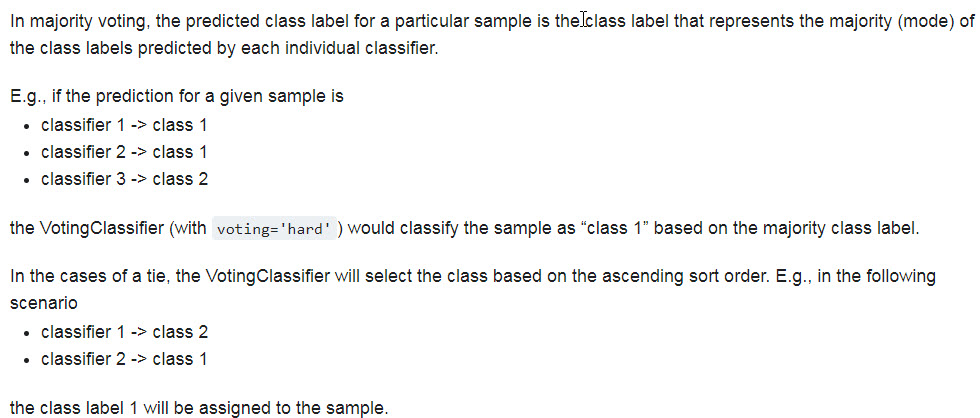

In [49]:
from IPython.display import Image
Image("VotingClassifier.JPG") 

For the models below, notice that they all require some type of tuning parameters/hyperparameters. For example, for logistic models, we currently use the solver='liblinear', which is an optimization algorithm suitable for small sample-sized problems. If we indicated solver='lbfgs', which stands for the **limited-memory BFGS algorithm**, an optimization algorithm in the family of quasi-Newton methods that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm using a limited amount of computer memory, we would then encounter a convergence failure. LBFGS is a popular optimization algorithm for parameter estimation in machine learning whose target problem is to minimize a function f() over unconstrained values of the real-vector x where f() is a differentiable scalar function.

In reality, what we recommend is that for each class of the model, we first select the best tuning parameter, and then combine them this way as a committee machine and then perform majority voting. Below, the model performed the best so far with an F1-score above 94% for 10-fold cross validation:

In [50]:
kfold = model_selection.KFold(n_splits=10)
estimators = [] # create the sub models

model1 = LogisticRegression(C=0.5, solver='liblinear')
model2 = DecisionTreeClassifier()
model3 = SVC(gamma='scale', kernel='rbf')
model4 = ExtraTreesClassifier(n_estimators=300)
model5 = RandomForestClassifier(n_estimators=300)
model6 = GaussianNB()

estimators.append(('Logistic:', model1))
estimators.append(('CART:', model2))
estimators.append(('SVC:', model3))
estimators.append(('Extra Trees:', model4))
estimators.append(('Random Forests:', model5))
estimators.append(('Naive Bayes (Gaussian):', model6)) # likelihood features is assumed to be Gaussian

print(estimators, '\n')

ensemble = VotingClassifier(estimators, voting='hard') # hard thresholding/majority-rule voting
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold, scoring='f1_macro') # getting 10-fold CV 
print('F1-score for CV:', results.mean()) # printing out the mean of the 10 fold CV F1-score

[('Logistic:', LogisticRegression(C=0.5, solver='liblinear')), ('CART:', DecisionTreeClassifier()), ('SVC:', SVC()), ('Extra Trees:', ExtraTreesClassifier(n_estimators=300)), ('Random Forests:', RandomForestClassifier(n_estimators=300)), ('Naive Bayes (Gaussian):', GaussianNB())] 

F1-score for CV: 0.9538695799717306


We can make the class label predictions:

In [51]:
ensemble.fit(X_train,y_train)
preds=ensemble.predict(X_test) # we have to fit the data first before predicting it
preds[0:20]

array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B'], dtype=object)

Of course, grid searches are often involved with this type of ensemble learning. What it does is that it gives options of filling out the different hyperparameters of each model and the comprehensive parameter lists is formed by using a dictionary 'params' as shown below:

In [52]:
kfold = model_selection.KFold(n_splits=5)

model1 = LogisticRegression(solver='liblinear')
model2 = DecisionTreeClassifier()
model3 = SVC(gamma='scale', kernel='rbf',  probability=True)
model4 = ExtraTreesClassifier()
model5 = RandomForestClassifier()
model6 = GaussianNB()

param_list=[('Logistic', model1), ('CART', model2), ('SVC', model3), ('ET', model4), ('RF', model5), ('NB', model6)]
ensemble = VotingClassifier(estimators=param_list, voting='soft')
params = {'Logistic__C':[1.0,2.0,3.0],'SVC__C':[1,2,3,4],'ET__n_estimators':[100,200],'RF__n_estimators':[80,100]} # needs to be a dictionary
grid = GridSearchCV(estimator=ensemble, param_grid=params, cv=kfold)

results2 = model_selection.cross_val_score(grid, X_train, y_train, cv=kfold, scoring='f1_macro') # getting 10-fold CV 
print('F1-score for CV:', results2.mean()) # printing out the mean of the 10 fold CV F1-score

F1-score for CV: 0.9451687593762225


In [53]:
grid.fit(X_train,y_train)
preds=grid.predict(X_test) # we have to fit the data first before predicting it
preds[0:20]

array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B'], dtype=object)

#### II. Bagging

Next let's talk about bagging. When it comes to the term bootstrap aggregating, most of the times we think of bagging tree. It turns out Python's definition on bagging goes beyond the tree method. In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. In many cases, bagging methods constitute a very simple way to improve with respect to a single model, without making it necessary to adapt the underlying base algorithm. As they provide a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).

Bagging methods come in many flavours but mostly differ from each other by the way they draw random subsets of the training set:
   1. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as **pasting**.
   2. When samples are drawn with replacement, then the method is known as **bagging**.
   3. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as **random subspaces**.
   4. Finally, when base estimators are built on subsets of both samples and features, then the method is known as **random patches**.
   
In scikit-learn, bagging methods are offered as a unified BaggingClassifier() meta-estimator (as well as BaggingRegressor()), taking as input a user-specified base estimator along with parameters specifying the strategy to draw random subsets. In particular, max_samples and max_features control the size of the subsets (in terms of samples and features), while bootstrap and bootstrap_features control whether samples and features are drawn with or without replacement. When using a subset of the available samples the generalization accuracy can be estimated with the out-of-bag samples by setting oob_score=True. As an example, the snippet below illustrates how to instantiate a bagging ensemble of Gaussian naive Bayes base estimators, each built on random subsets of 50% of the samples and 50% of the features:

In [54]:
seed=485
base = GaussianNB()
bagging_model= BaggingClassifier(base_estimator=base, max_samples=0.5, max_features=0.5, random_state=seed)

results3 = model_selection.cross_val_score(bagging_model, X_train, y_train, cv=kfold, scoring='f1_macro') # getting 10-fold CV 
print('F1-score for CV:', results3.mean()) # printing out the mean of the 10 fold CV F1-score

bagging_model.fit(X_train,y_train)
preds = bagging_model.predict(X_test)
preds[0:20]

F1-score for CV: 0.9259799541804583


array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B'], dtype=object)

#### III. Boosting

Next let's talk about boosting. **Boosting** is a form of sequential learning technique. The algorithm works by training a model with the entire training set, and subsequent models are constructed by fitting the residual error values of the initial model. In this way, Boosting attempts to give higher weight to those observations that were poorly estimated by the previous model. Once the sequence of the models are created the predictions made by models are weighted by their accuracy scores and the results are combined to create a final estimation. Models that are typically used in Boosting technique are **XGBoost (Extreme Gradient Boosting)**, **GBM (Gradient Boosting Machine)**, **ADABoost (Adaptive Boosting)** etc.

We first implement ADABoost:

In [55]:
ada_clf= AdaBoostClassifier(n_estimators=200)
scoring = ['precision_macro', 'recall_macro', 'f1_macro']

results4 = model_selection.cross_validate(ada_clf, X_train, y_train, cv=10, scoring=scoring) # getting 10-fold CV 
print('Average Precision for CV per fold:', results4['test_precision_macro'].mean())
print('Average Recall for CV per fold:', results4['test_recall_macro'].mean())
print('Average F1 score for CV per fold:', results4['test_recall_macro'].mean())
ada_clf.fit(X_train,y_train)
preds = ada_clf.predict(X_test)
preds[0:20] 

Average Precision for CV per fold: 0.9736073788256985
Average Recall for CV per fold: 0.9635069545059404
Average F1 score for CV per fold: 0.9635069545059404


array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M'], dtype=object)

The number of weak learners is controlled by the parameter "n_estimators". The word **learning rate** is often used in many machine learning algorithms. A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck. The "learning_rate" parameter controls the contribution of the weak learners in the final combination. By default, this value equals 1 and weak learners are **decision stumps**. Different weak learners can be specified through the "base_estimator" parameter. The main parameters to tune to obtain good results are "n_estimators" and the complexity of the "base estimators". The default base_estimators are DecisionTreeClassifier(max_depth=1) and the default n_estimator is set to be 8 (maximum number of estiators at which boosting is terminated). Keep in mind that there is a tradeoff between learning_rate and n_estimators. 

Simply put, Adaboost follows the steps below algorithmically:
   1. Initially, all observations in the dataset are given equal weights.
   2. A model is built on a subset of data.
   3. Using this model, predictions are made on the whole dataset.
   4. Errors are calculated by comparing the predictions and actual values.
   5. While creating the next model, higher weights are given to the data points which were predicted incorrectly.
   6. Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
   7. This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.
   
   

Next let's go over gradient boosting. **Gradient Boosting** trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function. 

Gradient boosting involves randomization. The number of samples used to fit each tree can be varied. This means that each tree is fit on a randomly selected subset of the training dataset. Using fewer samples introduces more variance for each tree, although it can improve the overall performance of the model. The number of samples used to fit each tree is specified by the "subsample=" argument and can be set to a fraction of the training dataset size. There are many other hyperparameters that can be tuned. Readers of interest can find the official 'sklearn' documentation online as a reference. For example, learning rate controls the amount of contribution that each model has on the ensemble prediction. Smaller rates may require more decision trees in the ensemble. The learning rate can be controlled via the "learning_rate=" argument and it defaults to 0.1.

In [56]:
gb_clf= GradientBoostingClassifier(n_estimators=300, subsample=0.9)
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']

results5 = model_selection.cross_validate(gb_clf, X_train, y_train, cv=10, scoring=scoring) # getting 10-fold CV 
print('Average Accuracy for CV per fold:', results5['test_accuracy'].mean())
print('Average Precision for CV per fold:', results5['test_precision_macro'].mean())
print('Average Recall for CV per fold:', results5['test_recall_macro'].mean())
print('Average F1 score for CV per fold:', results5['test_recall_macro'].mean())
gb_clf.fit(X_train,y_train)
preds = gb_clf.predict(X_test)
preds[0:20] 

Average Accuracy for CV per fold: 0.9518840579710146
Average Precision for CV per fold: 0.9546109931200005
Average Recall for CV per fold: 0.9459395827296436
Average F1 score for CV per fold: 0.9459395827296436


array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B'], dtype=object)

**XGBoost (Extreme Gradient Boosting)** is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as regularized boosting technique.

Three main forms of gradient boosting are supported:
   1. gradient boosting algorithm including the learning rate;
   2. stochastic gradient boosting with sub-sampling at the row, column and column per split levels;
   3. regularized gradient boosting with both L1 and L2 regularization.

System Features of XGBoost include:
   1. parallelization of tree construction using all of your CPU cores during training;
   2. distributed computing for training very large models using a cluster of machines;
   3. out-of-core computing for very large datasets that don’t fit into memory;
   4. cache optimization of data structures and algorithm to make best use of hardware.

In [57]:
xgb_clf= xgb.XGBClassifier(n_estimators=300, subsample=0.9)
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']

results6 = model_selection.cross_validate(xgb_clf, X_train, y_train, cv=10, scoring=scoring) # getting 10-fold CV 
print('Average Accuracy for CV per fold:', results6['test_accuracy'].mean())
print('Average Precision for CV per fold:', results6['test_precision_macro'].mean())
print('Average Recall for CV per fold:', results6['test_recall_macro'].mean())
print('Average F1 score for CV per fold:', results6['test_recall_macro'].mean())
xgb_clf.fit(X_train,y_train)
preds = xgb_clf.predict(X_test)
preds[0:20] 

Average Accuracy for CV per fold: 0.9519323671497585
Average Precision for CV per fold: 0.9539188723515478
Average Recall for CV per fold: 0.9460627354390032
Average F1 score for CV per fold: 0.9460627354390032


array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B'], dtype=object)

There are two more recent developments in the realm of boosting. The first one is LightGBM. **LightGBM** is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern. The images below will help you understand the difference in a better way:

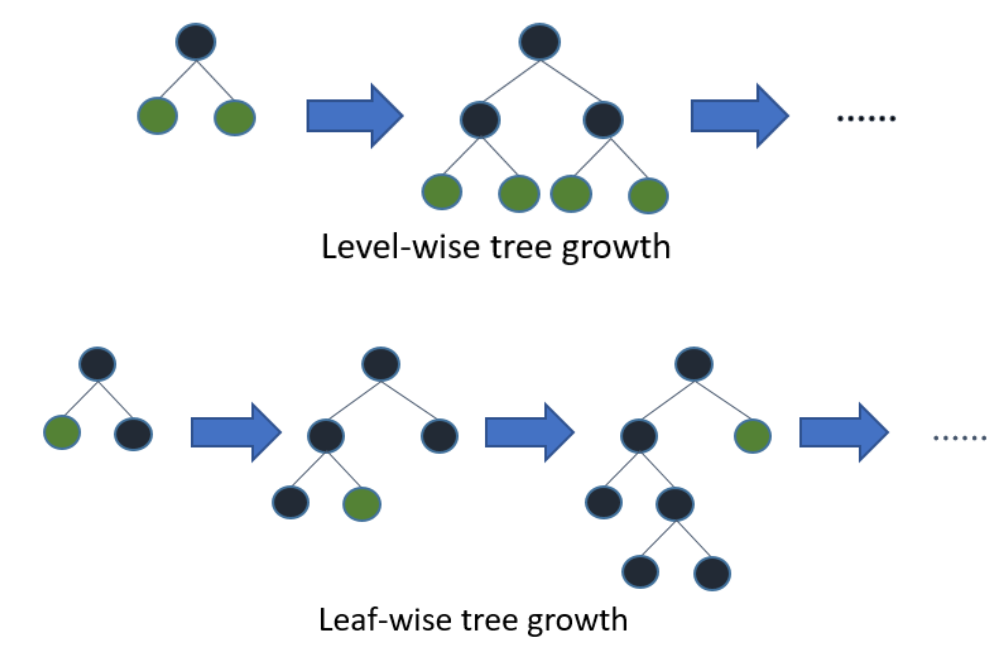

In [24]:
from IPython.display import Image 
Image("leafwise tree growth.PNG", width=400, height=400)

Leaf-wise growth may cause over-fitting on smaller datasets but that can be avoided by using the "max_depth=" parameter for learning. In general when the dataset is extremely large, lightGMB usually outperforms the normal gradient boosting algorithms.

The 'lighGBM' package has an API for 'scikit-learn' package. There are many parameters of the model you can specify, as you can experiment, the larger the learning rate, the better the overall performance. For another example, the 'max_depth=' argument describes the maximum depth of the trees. This parameter is used to handle model overfitting. If you feel that your model is overfitted, you should to lower the value of 'max_depth' (any value <=0 means no limit, default to -1).

In [59]:
lightgbm_clf = lgb.LGBMClassifier(learning_rate=0.1, boosting_type='gbdt', n_estimators=250)
lightgbm_clf.fit(X_train, y_train)
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro','roc_auc']

results7 = model_selection.cross_validate(lightgbm_clf, X_train, y_train, cv=10, scoring=scoring) # getting 10-fold CV 
print('Average Accuracy for CV per fold:', results7['test_accuracy'].mean())
print('Average Precision for CV per fold:', results7['test_precision_macro'].mean())
print('Average Recall for CV per fold:', results7['test_recall_macro'].mean())
print('Average F1 score for CV per fold:', results7['test_recall_macro'].mean())
print('Average AUC for CV per fold:', results7['test_roc_auc'].mean())

preds = lightgbm_clf.predict(X_test)
preds[0:20] 

Average Accuracy for CV per fold: 0.9585507246376812
Average Precision for CV per fold: 0.9626319808605682
Average Recall for CV per fold: 0.9512967255867866
Average F1 score for CV per fold: 0.9512967255867866
Average AUC for CV per fold: 0.9898290350623007


array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M'], dtype=object)

The second recent development is called **categorical boosting** (or **Catboost**). To use it, we will need to download a separate package rather than the sklearn. Details will be omitted here. Both 'Kaggle' website and the official 'Catboost5' documentation has details. 

#### IV. Stacking

Stacking is an ensemble learning technique that uses predictions from multiple models (say KNN, SVM or random forests) to build a new model. Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset). Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).

The architecture of a stacking model involves two or more base models, often referred to as level-0 models, and a meta-model that combines the predictions of the base models, referred to as a level-1 model:
   - Level-0 Models (base-models): models fit on the training data and whose predictions are compiled.
   - Level-1 Model (meta-model): model that learns how to best combine the predictions of the base models.
   
The meta-model is trained on the predictions made by base models on out-of-sample data. That is, data not used to train the base models is fed to the base models, predictions are made, and these predictions, along with the expected outputs, provide the input and output pairs of the training dataset used to fit the meta-model. The outputs from the base models used as input to the meta-model may be real value in the case of regression, and probability values, probability like values, or class labels in the case of classification. The most common approach to preparing the training dataset for the meta-model is via k-fold cross-validation of the base models, where the out-of-fold predictions are used as the basis for the training dataset for the meta-model.

For base-models, we suggest that we use a diverse range of models that make different assumptions about the prediction task. The meta-model is often simple, providing a smooth interpretation of the predictions made by the base models. As such, linear models are often used as the meta-model, such as linear regression for regression tasks (predicting a numeric value) and logistic regression for classification tasks (predicting a class label). Although this is common, it is not required.

The scikit-learn package has the stacking capability now via the StackingRegressor() and StackingClassifier() classes, as long as the package version is beyond '0.22.1'.

In [60]:
print(sklearn.__version__)

0.23.1


Let's use an example here. Let's make a pseudo dataset. And we will use a few instances of model classes for stacking. To evaluate the model, we use 5 types of models: logistic classifier, KNN classifier, decision tree classifier (CART), support vector classifier and Naive Bayes classifier. We use the 'accuracy' as the metric for evaluation. We will see that support vector machine achieves the best result so far in this example. A box-and-whisker plot is then created comparing the distribution accuracy scores for each model, allowing us to clearly see that KNN and SVM perform better on average than logistic model, CART, and Naive Bayes:

In [61]:
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y

def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

def evaluate_model(model, X, y, eval_metric): # evaluating a given model using repeated stratified CV
    """
    The argument "eval_metric" examples include 'accuracy'
    CV is done by repeated stratified K-fold validation
    """
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring=eval_metric, cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.824 (0.048)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


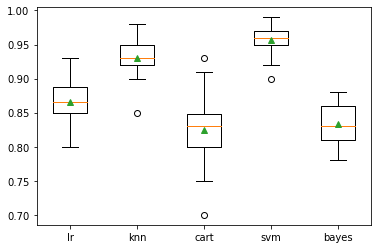

In [62]:
X, y = get_dataset()
models = get_models() # getting the models to evaluate

results, names = list(), list() # evaluating the models and storing results
for name, model in models.items():
    scores = evaluate_model(model, X, y, 'accuracy')
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show() # plotting  model performance for comparison

Next, we can try to combine these five models into a single ensemble model using stacking. We have chosen our base-models. Now we need to define the meta-model. Obviously, we can use a logistic regression model to learn how to best combine the predictions from each of the separate five models.

The get_stacking() function below defines the StackingClassifier() model by first defining a list of tuples for the five base models, then defining the logistic regression meta-model to combine the predictions from the base models using 5-fold cross-validation. We can also include the stacking ensemble in the list of models to evaluate, along with the standalone models:

In [63]:
def get_stacking(): # defining base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))

    level1 = LogisticRegression() # defining the meta learner model
    
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5) # defining the stacking ensemble
    
    return model

def get_models(): # getting a list of models to evaluate
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.821 (0.049)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.965 (0.019)


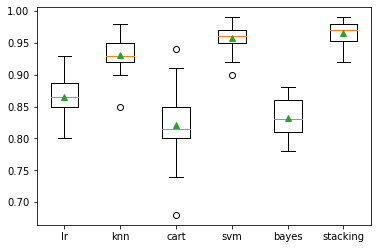

In [64]:
X, y = get_dataset()
models = get_models() # getting the models to evaluate

results, names = list(), list() # evaluating the models and storing results
for name, model in models.items():
    scores = evaluate_model(model, X, y, 'accuracy')
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show() # plotting  model performance for comparison

We see that stacking achieves better results. This is not always the case, but clearly when this happens it's a successful use case. 

References:
   - https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
   - https://www.datacamp.com/community/tutorials/ensemble-learning-python 
   - https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)
   - https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/
   - https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier
   - https://skymind.ai/wiki/accuracy-precision-recall-f1
   - https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab
   - https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
   - https://www.kaggle.com/prashant111/lightgbm-classifier-in-python
   - https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/